# Neural Network from scratch
ref: https://medium.com/@andresberejnoi/how-to-implement-backpropagation-with-numpy-andres-berejnoi-e7c14f2e683a
<br> https://www.askpython.com/python/examples/backpropagation-in-python
<br> https://medium.com/@waleedmousa975/building-a-neural-network-from-scratch-using-numpy-and-math-libraries-a-step-by-step-tutorial-in-608090c20466
<br> https://github.com/dennybritz/nn-from-scratch/blob/master/nn-from-scratch.ipynb

- Normalization (MinMax, MaxAbs, standardization)
- Initialize weight
- Activation function/dericative (Linear, Sigmoid)
- Feedforward
- Backpropagation
- Weight update(Sequential)

In [4]:
# install libraries
import numpy as np

## Normalization
- MinMax
- MaxAbs
- Standardization

In [2]:
X = np.array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])
X

array([[-1. ,  2. ],
       [-0.5,  6. ],
       [ 0. , 10. ],
       [ 1. , 18. ]])

#### MinMax Normalization
## $x_{scaled} =\frac{ x - x_{min}} {x_{max} - x_{min}}$

In [3]:
def MinMax(X):
    X_scaled = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))    
    return X_scaled

In [4]:
MinMax(X)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

In [5]:
# sklearn version: using libraries
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(X)

array([[0.  , 0.  ],
       [0.25, 0.25],
       [0.5 , 0.5 ],
       [1.  , 1.  ]])

#### MaxAbs Normalization
## $x_{scaled} =\frac{ x } {max(|x|)}$

In [6]:
def MaxAbs(X):
    X_scaled = X / np.absolute(X).max(axis=0)
    return X_scaled

In [7]:
MaxAbs(X)

array([[-1.        ,  0.11111111],
       [-0.5       ,  0.33333333],
       [ 0.        ,  0.55555556],
       [ 1.        ,  1.        ]])

In [6]:
# sklearn version
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
scaler.fit_transform(X)

array([[-1.        ,  0.11111111],
       [-0.5       ,  0.33333333],
       [ 0.        ,  0.55555556],
       [ 1.        ,  1.        ]])

#### Standardization Normalization
## $x_{scaled} =\frac{ x - \mu } {\sigma}$

In [9]:
def Standard(X):
    X_scaled = ( X - X.mean(axis=0) ) / X.std(axis=0)
    return X_scaled

In [10]:
Standard(X)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

In [11]:
# sklearn version
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X)

array([[-1.18321596, -1.18321596],
       [-0.50709255, -0.50709255],
       [ 0.16903085,  0.16903085],
       [ 1.52127766,  1.52127766]])

## Initialize Weights

In [12]:
# create a toy dataset
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])
X, y

(array([[0, 0],
        [0, 1],
        [1, 0],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [13]:
# hyperparameters settings
learning_rate = 0.1
iterations = 5000
# N = y_train_size

In [14]:
# initialize weights and biases
def initialize_parameters(input_size, hidden_size, output_size):
    np.random.seed(0)
    W1 = np.random.randn(hidden_size, input_size) * 0.01
    b1 = np.zeros((hidden_size, 1))
    W2 = np.random.randn(output_size, hidden_size) * 0.01
    b2 = np.zeros((output_size, 1))
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

parameters = initialize_parameters(2, 3, 1)

In [15]:
parameters

{'W1': array([[ 0.01764052,  0.00400157],
        [ 0.00978738,  0.02240893],
        [ 0.01867558, -0.00977278],
        [ 0.00950088, -0.00151357]]),
 'b1': array([[0.],
        [0.],
        [0.],
        [0.]]),
 'W2': array([[-0.00103219,  0.00410599,  0.00144044,  0.01454274]]),
 'b2': array([[0.]])}

## Activation Function
: to compute the weighted sum of inputs and biases
- Linear
- sigmoid / logistic
- Tanh / hyperbolic tangent
- ReLU + Leaky ReLU
- Softmax  

Linear
### $f(x) = ax+c$

In [32]:
def linear(x):
    return x

 Sigmoid
### $f(x) = \frac{1} {1 + e^{-x}}$

In [28]:
# sigmoid function


def sigmoid(x):
    return 1 / (1 + np.exp(-x))

tanh
### $ f(x) = tanh(x) = \frac{e^x-e^{-x}}{e^x+e^{-x}}$

In [33]:
# activation function and its derivative
def tanh(x, derivative=False):
    if derivative:
        return 1-np.tanh(x)**2
    else:
        return np.tanh(x)
    

def tanh(x):
    return np.tanh(x)

ReLU
### $ f(x) = max(0, x)$
Leaky ReLU
### $ f(x) = max(0.01x, x) $

In [44]:
def relu(x):
    return max(0,x)

def leakyrelu(x):
    return max(0.01*x, x)

Softmax
### $ f(x) = \frac{e^{x}}{\sum_{i=1}^K e^{x_{i}}} \ \ \ for\ i=1,2,\dots,K $

In [72]:
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x))

In [8]:
# https://gist.github.com/Lucs1590/1e7170bd664207e814354e6777b0bc99
# https://www.kaggle.com/code/selahattinbareleb/graphs-of-activation-functions-with-python
import matplotlib.pyplot as plt

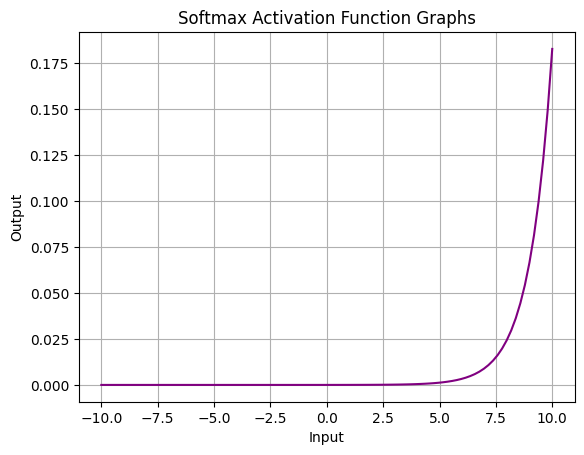

In [100]:
# sigmoid
x = np.linspace(-10,10,100)
sigmoid = 1/(1+np.exp(-x))
#tanh
tanh = np.tanh(x)
#relu
relu = np.maximum(0,x)
#leaky relu
Lrelu = np.maximum(0.01*x, x)
#softmax
softmax = np.exp(x) / np.sum(np.exp(x))

# plt.plot(x, x, c='k')
# plt.plot(x, sigmoid, c='r')
# plt.plot(x, tanh, c='y')
# plt.plot(x, relu, c='g')
# plt.plot(x, Lrelu, c='b')
plt.plot(x, softmax, c='purple')
plt.xlabel('Input')
plt.ylabel('Output')
# plt.ylim([-3,1])
# plt.xlim([-5,5])
plt.title('Softmax Activation Function Graphs')
plt.grid(True)
plt.show()

## Feedforward

In [30]:
# forward propagation
def forward_propagation(X, parameters):
    # retrieve the parameters
    W1, b1, W2, b2 = list(parameters.values())
    
    # compute the activation of the hidden layer
    Z1 = np.dot(W1, X.T) + b1
    A1 = sigmoid(Z1)
    
    # compute the activation of the output layer
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    
    return A2, cache

In [31]:
forward_propagation(X, parameters)

(array([[0.5023821 , 0.50238534, 0.50239379, 0.50239703]]),
 {'Z1': array([[ 0.        ,  0.00400157,  0.01764052,  0.0216421 ],
         [ 0.        ,  0.02240893,  0.00978738,  0.03219631],
         [ 0.        , -0.00977278,  0.01867558,  0.0089028 ],
         [ 0.        , -0.00151357,  0.00950088,  0.00798731]]),
  'A1': array([[0.5       , 0.50100039, 0.50441002, 0.50541031],
         [0.5       , 0.505602  , 0.50244683, 0.50804838],
         [0.5       , 0.49755682, 0.50466876, 0.50222569],
         [0.5       , 0.49962161, 0.5023752 , 0.50199682]]),
  'Z2': array([[0.00952848, 0.00954143, 0.00957525, 0.00958819]]),
  'A2': array([[0.5023821 , 0.50238534, 0.50239379, 0.50239703]])})

## Loss Function
https://tariqueakhtar-39220.medium.com/implementing-loss-or-cost-function-in-python-from-scratch-a6906428092e
<br> https://www.pinecone.io/learn/cross-entropy-loss/

<br>Regression
- MSE
- MAE
- SSE

<br>Classification
- Cross Entropy

Mean Squared Error MSE
## $\frac{1}{n}\sum_{i=1}^{D}(x_i-y_i)^2$

In [85]:
def mean_squared_error(A2, y_true):
    # One-hot encode y_true (i.e., convert [0, 1, 2] into [[1, 0, 0], [0, 1, 0], [0, 0, 1]])
    y_true_one_hot = np.eye(output_size)[y_true]
     
    # Reshape y_true_one_hot to match y_pred shape
    y_true_reshaped = y_true_one_hot.reshape(A2.shape)
     
    # Compute the mean squared error between y_pred and y_true_reshaped
    error = ((A2 - y_true_reshaped)**2).sum() / (2*A2.size)
 
    return error

def mse(y_true, y_predicted):
    total_error = 0
    for yt, yp in zip(y_true, y_predicted):
        total_error += (yt-yp)**2
    print("Total Squared Error:",total_error)
    mse = total_error/len(y_true)
    print("Mean Squared Error:",mse)
    return mse

Mean Absolute Error MAE
### $\frac{1}{n}\sum_{i=1}^{D}|x_i-y_i|$

In [38]:
def mean_absolute_error(y_predicted, y_true):
    total_error = 0
    for yp, yt in zip(y_predicted, y_true):
        total_error += abs(yp - yt)
    # print("Total error is:",total_error)
    mae = total_error/len(y_predicted)
    # print("Mean absolute error is:",mae)
    return mae

Binary Cross Entropy
### $-\frac{1}{N}\sum_{i=1}^{N} {(y_i\log(p_i) + (1 - y_i)\log(1 - p_i))}$
Categorical Cross Entropy
### $-\frac{1}{N}\sum \sum_{i=1}^My_{i}\log(p_{i})$

In [87]:
# binary
def binary_cross_entropy(y_true,A2):
    y_true = np.float_(y_true)
    A2 = np.float_(A2)
    # binary cross-entropy loss
    return -np.sum(y_true * np.log(A2) + (1 - y_true) * np.log(1 - A2))

#categorical
def categorical_cross_entropy(y_true_list,y_pred_list):
    y_true_list = np.float_(y_true_list)
    y_pred_list = np.float_(y_pred_list)
    losses = []
    for y_true,y_pred in zip(y_true_list,y_pred_list):
      loss = -np.sum(y_true * np.log(y_pred))
      losses.append(loss)
      print(f't:{y_true}, y_pred:{y_pred},loss:{loss}\n')
    return np.sum(losses)

## Backpropagation

In [88]:
# backward propagation
def backward_propagation(parameters, cache, X, y):
    m = y.shape[0]
    
    # retrieve the intermediate values
    Z1 = cache["Z1"]
    A1 = cache["A1"]
    Z2 = cache["Z2"]
    A2 = cache["A2"]
    
    # compute the derivative of the loss with respect to A2
    dA2 = - (y/A2) + ((1-y)/(1-A2))
    
    # compute the derivative of the activation function of the output layer
    dZ2 = dA2 * (A2 * (1-A2))
    
    # compute the derivative of the weights and biases of the output layer
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)
    
    # compute the derivative of the activation function of the hidden layer
    dA1 = np.dot(parameters["W2"].T, dZ2)
    dZ1 = dA1 * (A1 * (1-A1))
    
    # compute the derivative of the weights and biases of the hidden layer
    dW1 = (1/m) * np.dot(dZ1, X)
    db1 = (1/m) * np.sum(dZ1, axis=1, keepdims=True)
    gradients = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return gradients

## Weight Update

In [89]:
# update parameters
def update_parameters(parameters, gradients, learning_rate):
    # retrieve the gradients
    dW1 = gradients["dW1"]
    db1 = gradients["db1"]
    dW2 = gradients["dW2"]
    db2 = gradients["db2"]
    
    # retrieve the weights and biases
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    
    # update the weights and biases
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

## Combining as one flow

In [ ]:
# model settings
# hyperparameters settings
learning_rate = 0.1
iterations = 5000

hidden 